<a href="https://colab.research.google.com/github/anitarestrepo16/machine-learning-class-2023/blob/main/MiniProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
covid = pd.read_csv('/drive/My Drive/Colab Notebooks/Data-Covid002.csv', engine='python',encoding='latin1')
covid.head()

,county,state,fips,cases,deaths,population,casespc,deathspc,cty,county_name,...,taxrate,tax_st_diff_top20,summer_tmmx,summer_rmax,winter_tmmx,winter_rmax,pm25,bmdeaths,bmcruderate,pm25_mia
0,Autauga,Alabama,1001,4434,152,918492,482.74780,16.548864,1001,Autauga,...,0.011183,0.0,306.02344,96.055420,288.08508,85.651848,11.712587,7893,859.29999,0
1,Baldwin,Alabama,1003,10465,278,3102984,337.25601,8.959118,1003,Baldwin,...,0.011756,0.0,305.51663,97.971542,290.20886,89.730972,10.077723,30292,976.20001,0
2,Barbour,Alabama,1005,3157,33,499262,632.33331,6.609756,1005,Barbour,...,0.012059,0.0,306.06226,97.371674,289.24210,88.633575,10.981967,5197,1040.90000,0
3,Bibb,Alabama,1007,2291,24,397470,576.39569,6.038192,1007,Bibb,...,0.008007,0.0,305.98218,96.293076,287.36282,86.485870,11.998714,4089,1028.80000,0
4,Blount,Alabama,1009,2082,15,997531,208.71532,1.503713,1009,Blount,...,0.007012,0.0,305.17886,94.630951,285.56567,85.449142,11.793022,9912,993.70001,0


In [4]:
covid.drop(['fips', 'casespc', 'cases', 'deaths', 'population', 'cty', 'county_name', 'cty_pop2000', 'cz', 'cz_name',
       'cz_pop2000', 'statename', 'state_id', 'stateabbrv', 'csa', 'csa_name',
       'cbsa', 'cbsa_name',], axis = 1, inplace=True)
covid.head()

,county,state,deathspc,intersects_msa,cur_smoke_q1,cur_smoke_q2,cur_smoke_q3,cur_smoke_q4,bmi_obese_q1,bmi_obese_q2,...,taxrate,tax_st_diff_top20,summer_tmmx,summer_rmax,winter_tmmx,winter_rmax,pm25,bmdeaths,bmcruderate,pm25_mia
0,Autauga,Alabama,16.548864,1,0.333333,0.238095,0.208333,0.133333,0.375000,0.238095,...,0.011183,0.0,306.02344,96.055420,288.08508,85.651848,11.712587,7893,859.29999,0
1,Baldwin,Alabama,8.959118,1,0.268097,0.233503,0.167464,0.176991,0.298050,0.262467,...,0.011756,0.0,305.51663,97.971542,290.20886,89.730972,10.077723,30292,976.20001,0
2,Barbour,Alabama,6.609756,0,0.228571,0.250000,0.181818,0.111111,0.294118,0.571429,...,0.012059,0.0,306.06226,97.371674,289.24210,88.633575,10.981967,5197,1040.90000,0
3,Bibb,Alabama,6.038192,1,0.244444,0.280000,0.181818,0.150000,0.466667,0.375000,...,0.008007,0.0,305.98218,96.293076,287.36282,86.485870,11.998714,4089,1028.80000,0
4,Blount,Alabama,1.503713,1,0.304348,0.260870,0.352941,0.166667,0.347826,0.318182,...,0.007012,0.0,305.17886,94.630951,285.56567,85.449142,11.793022,9912,993.70001,0


In [5]:
na_vars = covid.isnull().sum()
na_vars[na_vars != 0]

reimb_penroll_adj10           4
mort_30day_hosp_z             1
adjmortmeas_amiall30day       1
med_prev_qual_z              95
primcarevis_10                9
diab_hemotest_10             38
diab_eyeexam_10              53
diab_lipids_10               50
mammogram_10                 78
amb_disch_per1000_10         65
gini99                       99
inc_share_1perc              99
frac_middleclass              1
rel_tot                       1
pop_d_2000_1980               7
lf_d_2000_1980                7
mig_inflow                   90
mig_outflow                  90
ccd_exp_tot                  27
ccd_pup_tch_ratio           266
score_r                      38
dropout_r                   628
tuition                    1816
gradrate_r                 1808
e_rank_b                    259
crime_total                 175
tax_st_diff_top20             1
dtype: int64

In [6]:
covid.dropna(inplace=True)
na_vars = covid.isnull().sum()
na_vars[na_vars != 0]

Series([], dtype: int64)

In [7]:
covid.state.unique()

array(['Alabama', 'Arizona', 'Arkansas', 'Connecticut', 'Delaware',
       'Georgia', 'Idaho', 'Illinois', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Texas', 'Utah', 'Vermont',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
pd.get_dummies(covid, columns = ["state"])

,county,deathspc,intersects_msa,cur_smoke_q1,cur_smoke_q2,cur_smoke_q3,cur_smoke_q4,bmi_obese_q1,bmi_obese_q2,bmi_obese_q3,...,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Texas,state_Utah,state_Vermont,state_West Virginia,state_Wisconsin,state_Wyoming
1,Baldwin,8.959118,1,0.268097,0.233503,0.167464,0.176991,0.298050,0.262467,0.193237,...,0,0,0,0,0,0,0,0,0,0
7,Calhoun,6.413799,1,0.294118,0.240356,0.170886,0.182482,0.250000,0.317073,0.266234,...,0,0,0,0,0,0,0,0,0,0
15,Coffee,2.684003,1,0.196078,0.289474,0.100000,0.171429,0.369565,0.277778,0.366667,...,0,0,0,0,0,0,0,0,0,0
16,Colbert,9.585782,1,0.354839,0.250000,0.000000,0.190476,0.409836,0.463415,0.416667,...,0,0,0,0,0,0,0,0,0,0
17,Conecuh,4.582779,0,0.272727,0.444444,0.000000,0.000000,0.300000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,Laramie,3.802303,1,0.340897,0.244410,0.162342,0.135569,0.227248,0.212970,0.209125,...,0,0,0,0,0,0,0,0,0,1
3096,Natrona,0.302376,1,0.353198,0.257286,0.207684,0.135472,0.261434,0.219814,0.216702,...,0,0,0,0,0,0,0,0,0,1
3098,Park,0.000000,0,0.235222,0.182682,0.136038,0.075881,0.212198,0.176216,0.170316,...,0,0,0,0,0,0,0,0,0,1
3100,Sheridan,0.000000,0,0.320755,0.178330,0.189573,0.107623,0.211679,0.202546,0.214976,...,0,0,0,0,0,0,0,0,0,1


In [9]:
train, test = train_test_split(covid, test_size = 0.2, random_state = 25)
display(train.head())
display(test.head())

,county,state,deathspc,intersects_msa,cur_smoke_q1,cur_smoke_q2,cur_smoke_q3,cur_smoke_q4,bmi_obese_q1,bmi_obese_q2,...,taxrate,tax_st_diff_top20,summer_tmmx,summer_rmax,winter_tmmx,winter_rmax,pm25,bmdeaths,bmcruderate,pm25_mia
497,Troup,Georgia,26.594490,1,0.090909,0.062500,0.000000,0.071429,0.500000,0.250000,...,0.019655,0.00,305.61523,95.940887,287.54749,87.799347,11.622005,11720,1005.40000,0
1583,Hill,Montana,0.000000,0,0.363636,0.215116,0.201705,0.153846,0.276074,0.270833,...,0.019672,0.00,300.47922,83.122429,273.12369,90.844872,3.380106,2669,911.40002,0
1940,Surry,North Carolina,2.524553,1,0.370656,0.295455,0.142857,0.088235,0.307054,0.272189,...,0.015248,1.00,302.95798,93.797501,282.86664,77.992798,10.357016,14841,1135.40000,0
1985,Mountrail,North Dakota,0.000000,0,0.388889,0.312500,0.200000,0.000000,0.555556,0.533333,...,0.017019,3.44,299.31897,89.665260,268.14575,91.298195,4.423579,1516,1087.00000,0
507,Wayne,Georgia,0.000000,1,0.211538,0.250000,0.217391,0.100000,0.400000,0.428571,...,0.026402,0.00,306.64200,98.347206,291.20850,90.117737,10.349192,5184,995.79999,0


,county,state,deathspc,intersects_msa,cur_smoke_q1,cur_smoke_q2,cur_smoke_q3,cur_smoke_q4,bmi_obese_q1,bmi_obese_q2,...,taxrate,tax_st_diff_top20,summer_tmmx,summer_rmax,winter_tmmx,winter_rmax,pm25,bmdeaths,bmcruderate,pm25_mia
1158,Allegany,Maryland,33.794163,1,0.272849,0.220513,0.140845,0.144186,0.272981,0.224599,...,0.018325,1.0,301.25504,91.034729,277.47534,85.105438,10.858380,16450,1232.60000,0
365,Ben Hill,Georgia,5.738515,0,0.409091,0.263158,1.000000,0.166667,0.409091,0.470588,...,0.021014,0.0,306.56223,96.990685,289.94113,87.198586,10.855447,3761,1199.00000,0
462,Muscogee,Georgia,15.537071,1,0.261146,0.209354,0.166667,0.097222,0.329646,0.245496,...,0.019444,0.0,306.17218,94.239967,288.63913,84.645096,12.671142,32654,951.90002,0
1142,Androscoggin,Maine,4.373542,1,0.300921,0.234973,0.167038,0.082645,0.281481,0.263873,...,0.024858,0.0,298.23334,88.627174,273.00107,83.580750,6.017636,18829,980.40002,0
1848,Ulster,New York,36.196602,1,0.339623,0.210526,0.214286,0.156463,0.293333,0.224242,...,0.042328,0.0,299.15216,89.545975,274.80234,83.697891,8.673356,28527,875.79999,0


# Q6

In [80]:
X = train.drop(["deathspc", "county", "state"], axis = 1)
y = train['deathspc']
mod = LinearRegression().fit(X, y)

Training MSE:  

In [81]:
y_pred = mod.predict(train.drop(["deathspc", "county", "state"], axis = 1))
mean_squared_error(train['deathspc'], y_pred)

1468.5822663864965

Test MSE:  

In [82]:
y_pred = mod.predict(test.drop(["deathspc", "county", "state"], axis = 1))
mean_squared_error(test['deathspc'], y_pred)

4080.383184357558

# Q7

## Lasso

In [16]:
alphas = np.linspace(.01, 5, 100)
X = train.drop(["deathspc", "county", "state"], axis = 1)
y = train['deathspc']
lasso_cv = make_pipeline(StandardScaler(), LassoCV(alphas=alphas, cv=10, random_state=1)).fit(X, y)

In [17]:
# pull the model results from the pipeline object
lasso = lasso_cv[-1]
lasso

LassoCV(alphas=array([0.01      , 0.06040404, 0.11080808, 0.16121212, 0.21161616,
       0.2620202 , 0.31242424, 0.36282828, 0.41323232, 0.46363636,
       0.5140404 , 0.56444444, 0.61484848, 0.66525253, 0.71565657,
       0.76606061, 0.81646465, 0.86686869, 0.91727273, 0.96767677,
       1.01808081, 1.06848485, 1.11888889, 1.16929293, 1.21969697,
       1.27010101, 1.32050505, 1.37090909, 1.42131313, 1.47171717,
       1.5221...
       3.28626263, 3.33666667, 3.38707071, 3.43747475, 3.48787879,
       3.53828283, 3.58868687, 3.63909091, 3.68949495, 3.73989899,
       3.79030303, 3.84070707, 3.89111111, 3.94151515, 3.99191919,
       4.04232323, 4.09272727, 4.14313131, 4.19353535, 4.24393939,
       4.29434343, 4.34474747, 4.39515152, 4.44555556, 4.4959596 ,
       4.54636364, 4.59676768, 4.64717172, 4.69757576, 4.7479798 ,
       4.79838384, 4.84878788, 4.89919192, 4.94959596, 5.        ]),
        cv=10, random_state=1)

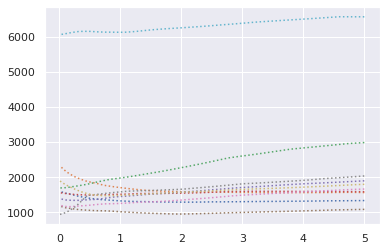

In [18]:
plt.plot(lasso.alphas_, lasso.mse_path_, linestyle=":")

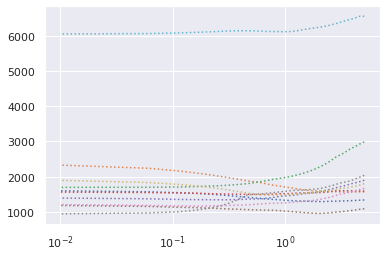

In [19]:
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")

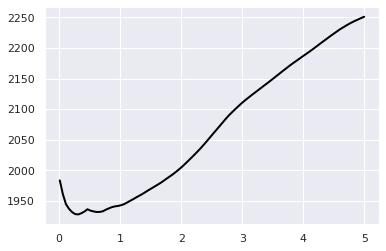

In [20]:
plt.plot(
    lasso.alphas_,
    # take the average of the MSEs across the 10 folds for each value of lambda
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)

In [ ]:
lasso.mse_path_[0].mean()

2250.8063242069557

In [ ]:
lasso.alpha_

0.3124242424242425

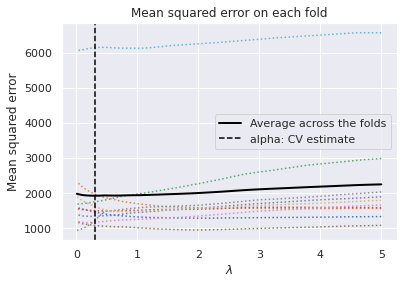

In [ ]:
plt.plot(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel(r"$\lambda$")
plt.ylabel("Mean squared error")
plt.legend()
_ = plt.title(
    f"Mean squared error on each fold"
)

In [ ]:
lasso.n_features_in_

72

## Ridge Regression

In [54]:
alphas = np.linspace(.01, 50, 100)
X = train.drop(["deathspc", "county", "state"], axis = 1)
y = train['deathspc']
ridge_cv = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, cv=10, scoring = "neg_mean_squared_error")).fit(X, y)

Can't use the RidgeCV one because it will not return the MSEs for the different folds at the different values of lambda

In [55]:
alphas = {'alpha': alphas}
ridge_cv = GridSearchCV(Ridge(), alphas, scoring = 'neg_mean_squared_error', cv = 10, return_train_score = True)

In [56]:
ridge = make_pipeline(StandardScaler(), ridge_cv).fit(X, y)
ridge

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.079292...
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01])},
                              return_train_score=True,
                              scoring='neg_mean_squared_error'))])

In [57]:
res = ridge[-1]
res

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.59414141e+00, 9.09909091e+00, 9...
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
cv_res = pd.DataFrame(res.cv_results_)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006421,0.002614,0.000760,0.000526,0.01,{'alpha': 0.01},-1600.469494,-2349.376313,-1693.204486,-1562.882993,...,-1469.511588,-1488.440025,-1499.097705,-1527.418720,-1520.461939,-1567.615188,-1476.031773,-1035.845239,-1450.195657,142.349735
1,0.005727,0.000596,0.000641,0.000272,0.514949,{'alpha': 0.5149494949494949},-1595.901676,-2329.176265,-1693.883643,-1561.096594,...,-1469.596415,-1488.496575,-1499.352198,-1527.727530,-1520.588084,-1567.712748,-1476.086421,-1035.943837,-1450.326872,142.363899
2,0.005723,0.000380,0.000712,0.000326,1.019899,{'alpha': 1.0198989898989899},-1591.382030,-2311.900600,-1694.824090,-1559.226152,...,-1469.744665,-1488.608181,-1499.712789,-1528.149799,-1520.809633,-1567.882819,-1476.230410,-1036.102695,-1450.542328,142.385256
3,0.006683,0.001523,0.000641,0.000098,1.524848,{'alpha': 1.5248484848484847},-1587.008001,-2296.184499,-1695.872717,-1557.362666,...,-1469.921026,-1488.753355,-1500.059406,-1528.540709,-1521.068040,-1568.084482,-1476.447962,-1036.280664,-1450.784345,142.406547
4,0.005392,0.000496,0.000572,0.000136,2.029798,{'alpha': 2.0297979797979795},-1582.799543,-2281.519599,-1696.987070,-1555.538787,...,-1470.120789,-1488.927255,-1500.390833,-1528.902165,-1521.352211,-1568.312381,-1476.727582,-1036.474521,-1451.047188,142.427300


In [59]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [60]:
res.best_estimator_.alpha

35.86141414141414

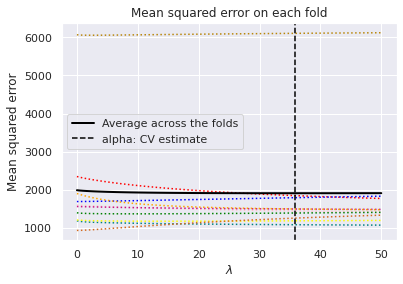

In [61]:
#plt.plot(cv_res['param_alpha'], cv_res['mean_test_score'], linestyle=":")
folds = [('split0_test_score', 'pink'), ('split1_test_score', 'red'),\
         ('split2_test_score', 'blue'), ('split3_test_score', 'mediumvioletred'),\
         ('split4_test_score', 'green'), ('split5_test_score', 'teal'),\
         ('split6_test_score', 'yellow'), ('split7_test_score', 'chocolate'),\
         ('split8_test_score', 'orange'), ('split9_test_score', 'darkgoldenrod')]
for split, col in folds:
    plt.plot(cv_res['param_alpha'], -1*cv_res[split], color = col, linestyle=":")
plt.plot(
    cv_res['param_alpha'],
    -1*cv_res['mean_test_score'],
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(x = res.best_estimator_.alpha, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel(r"$\lambda$")
plt.ylabel("Mean squared error")
plt.legend()
_ = plt.title(
    f"Mean squared error on each fold"
)

# Q8

In [63]:
# best values for lambda:
lasso_alpha = lasso.alpha_
ridge_alpha = res.best_estimator_.alpha
print("lasso: ", lasso_alpha)
print("ridge: ", ridge_alpha)

lasso:  0.3124242424242425
ridge:  35.86141414141414


In [ ]:
lasso_final = make_pipeline(StandardScaler(), Lasso(lasso_alpha)).fit(X, y)
ridge_final = make_pipeline(StandardScaler(), Ridge(ridge_alpha)).fit(X, y)

## Train MSEs

In [76]:
y_pred = lasso_final.predict(train.drop(["deathspc", "county", "state"], axis = 1))
lasso_train_mse = mean_squared_error(train['deathspc'], y_pred)

In [77]:
y_pred = ridge_final.predict(train.drop(["deathspc", "county", "state"], axis = 1))
ridge_train_mse = mean_squared_error(train['deathspc'], y_pred)

In [79]:
print("lasso train MSE: ", lasso_train_mse)
print("ridge train MSE: ", ridge_train_mse)

lasso train MSE:  1501.4559538682176
ridge train MSE:  1502.022497373431


## Test MSEs

In [74]:
y_pred = lasso_final.predict(test.drop(["deathspc", "county", "state"], axis = 1))
lasso_test_mse = mean_squared_error(test['deathspc'], y_pred)

In [72]:
y_pred = ridge_final.predict(test.drop(["deathspc", "county", "state"], axis = 1))
ridge_test_mse = mean_squared_error(test['deathspc'], y_pred)

In [75]:
print("lasso test MSE: ", lasso_test_mse)
print("ridge test MSE: ", ridge_test_mse)

lasso test MSE:  4024.126470349735
ridge test MSE:  4100.419931117558
